# Домашнее задание № 6

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [6]:
# посмотрим, что это такое
type(housing)

sklearn.utils._bunch.Bunch

In [7]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [9]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [10]:
# преобразую data в уже привычный мне df
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# Целевая переменная – MedHouseVal
target = pd.DataFrame(housing.target, columns=housing.target_names)
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
df = pd.DataFrame(housing.frame)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
# проверим на пропуски
filtered_df = df[df.isna().any(axis=1)]
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


будем считать, что этот тип данных я тоже освоил)

In [15]:
data_processed = df

In [16]:
data_processed.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Поля данных в наборе California housing dataset, загружаемом с помощью функции fetch_california_housing(), означают следующее:
1. MedInc — средний доход в группе блоков;
2. HouseAge — средний возраст дома в группе блоков;
3. AveRooms — среднее количество комнат на домохозяйство;
4. AveBedrms — среднее количество спален на домохозяйство;
5. Population — население группы блоков;
6. AveOccup — среднее количество членов домохозяйства;
7. Latitude — широта группы блоков;
8. Longitude — долгота группы блоков.

MedHouseVal - Целевая переменная — средняя стоимость дома в округах Калифорнии, выраженная в сотнях тысяч долларов

Будем использовать линейную регрессию для тестирования качества данных

In [17]:
from sklearn.preprocessing import StandardScaler

def get_score(X,y, random_seed=42, model=None):

    tmp_columns = list(X.columns.values[~np.isin(X.columns.values, 'MedHouseVal')])
    X = X[tmp_columns]

    if model is None:
       model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [18]:
# с этой колонкой будем работать
#tmp_columns = columns
#tmp_columns

посмотрим, что мы получим на не обработанных данных

In [19]:
get_score(data_processed, data_processed['MedHouseVal'])

0.575787706032451

чуть лучше, чем просто монетку подбрасывать

# 1 MedInc — средний доход в группе блоков

In [20]:
tmp = data_processed.copy()
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])

"""
def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    """

'\ndef get_pairplot(X, columns=None):\n    if columns is None:\n        columns = list(X.columns)\n    sns.pairplot(X[columns])\n    '

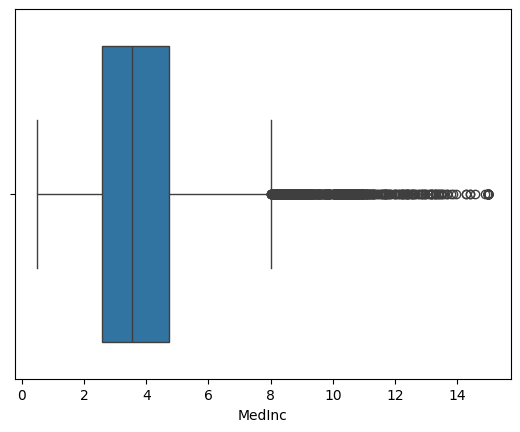

In [22]:
get_boxplot(tmp, columns=['MedInc'])

проверим значения больше 8

In [23]:
tmp[tmp['MedInc'] > 8].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.926
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19,3.352
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.512


Ни каких видимых отклонений я не обноружил.
Единственное объяснение - зависимость от района проживания.
Придется в первую очерель обратиться к геоданным.

# Первоначальная работа с геоданными

По данным Википедии Калифорния разделена на 58 округов.

In [24]:
from sklearn.cluster import DBSCAN, KMeans

In [25]:
# разделим наши геоданные на 58 кластеров
# решение не идеальное, но вполне объяснимое -
# наши данные будут группироваться по географическому признаку
# сопостовимому с административным устройством
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=58)
cluster = kmeans.fit_predict(data_processed[['Latitude', 'Longitude']])
cluster

array([47, 47, 47, ..., 41, 41, 41], dtype=int32)

In [26]:
# посмотрим на уникальнын значения в наших кластерах
unique, frequency = np.unique(cluster,
                              return_counts = True)
print("Unique Values:", unique)
print("Frequency Values:", frequency)

Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
Frequency Values: [ 931  728  112  712   99   36  305  202  140  152  416 1011  723  382
  132  116  167 1353  124  436  262  897  168   15  317  127  131   70
  138  107  506  287  136  281  468  485   29   85  138  328  286  132
   39 1160  555  674  438  854   22  122   31  106 1014  387   56  425
  697  390]


In [27]:
tmp['cluster'] = cluster
tmp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,41
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,41
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,41
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,41


Посмотрим (выборочно) что дали кластеры для анализа выбросов

cluster  18


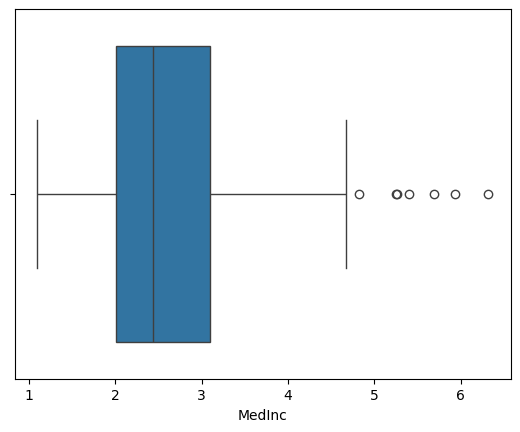

In [28]:
rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
get_boxplot(tmp[tmp['cluster'] == int(rand_int)], columns=['MedInc'])

In [29]:
# посмотрим на результат
get_score(tmp, tmp['MedHouseVal'])

0.5757428148776793

бало 0.575787706032451

In [30]:
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47


Чуть чуть получше

преобразуем параметр cluster

In [31]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.5 MB/s eta 0:00:00


In [32]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.count import CountEncoder

# функции для обработки категорий

def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each)
        X = pd.concat([X, dummies], axis=1)
    return X

def get_label(X, cols):
    X = X.copy()
    for each in cols:
        le = LabelEncoder()
        labels = le.fit_transform(X[each])
        X[each] = labels
    return X

def get_count(X, cols):
    X = X.copy()

    for col in cols:
        X[col] = X[col].astype('str')

    ce = CountEncoder(handle_unknown=-1)
    ce.fit(X[cols])
    X[cols] = ce.transform(X[cols])
    return X

In [33]:
# попробуем представить наши кластеры по другому
tmp = get_one_hot(tmp, cols=['cluster'])
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,False,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,False,False


In [34]:
get_score(tmp, tmp['MedHouseVal'])

0.685242061724715

было 0.5760570007083643

уже лучше

In [35]:
# сохраним полученные данные
data_processed = tmp.copy()
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,False,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,False,False


Попробую добавить столбец с frequency.
Логика такая: если объектов там больше то и привлекательность этого кластера выше



In [36]:
tmp['frequency'] = np.nan
for i, value in enumerate(frequency):
  tmp['frequency'] = tmp['frequency'].mask(tmp['cluster'] == i, value)
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,False,854.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,False,854.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,False,854.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,False,854.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,False,854.0


In [37]:
get_score(tmp, tmp['MedHouseVal'])

0.6854406907195381

прошлое значение - 0.6603436435667484

In [38]:
# сохраним полученные данные
data_processed = tmp.copy()

построим MedInc - MedHouseVal

In [39]:
# построим функцию для отображения "Параметр-MedHouseVal"
def effect_of_parameter (data, parameter=None,
                         target='MedHouseVal', random_case=False):

  if random_case == False:
    plt.scatter(data[parameter], data[target])
    plt.title('{} - {}'.format(parameter, target))
    plt.xlabel(parameter)
    plt.ylabel(target)
    plt.show()

  else:
    rand_int = np.random.randint(0, 58)
    data_ = data[data['cluster'] == rand_int]
    plt.scatter(data_[parameter], data_[target])
    plt.title('{} - {}, cluster {}'.format(parameter, target, rand_int))
    plt.xlabel(parameter)
    plt.ylabel(target)
    plt.show()

  return

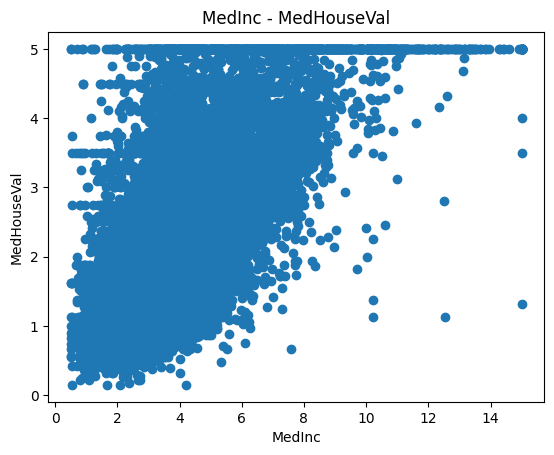

In [40]:
effect_of_parameter (tmp, parameter='MedInc', random_case=False)

На некоторых графиках видна четкая линия (большое скопление точек) сверху. Но ее смысл я не могу понять

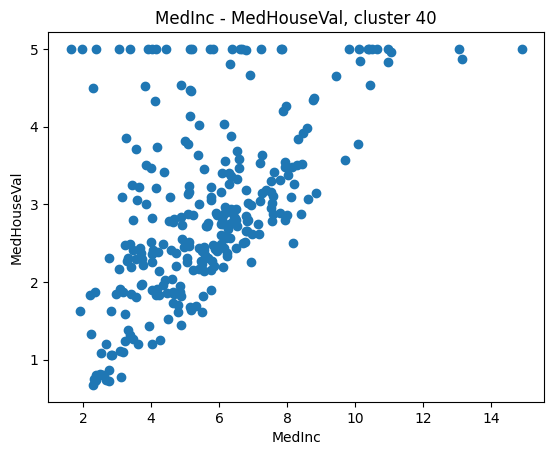

In [41]:
# и тоже по случайному кластеру
effect_of_parameter (tmp, parameter='MedInc', random_case=True)

На графиках видно, что большая часть значений лежит в нижней части. И меньшая часть имеет заметный "выброс". Добавлю новый столбец куда запишу квадратный корень из MedInc. Это должно "выровнять" значения

In [42]:
tmp['sqrt_MedInc'] = tmp['MedInc']**(1/2)
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,sqrt_MedInc
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,854.0,2.885342
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,854.0,2.881215
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,854.0,2.693956
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,854.0,2.375521
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,854.0,1.961173


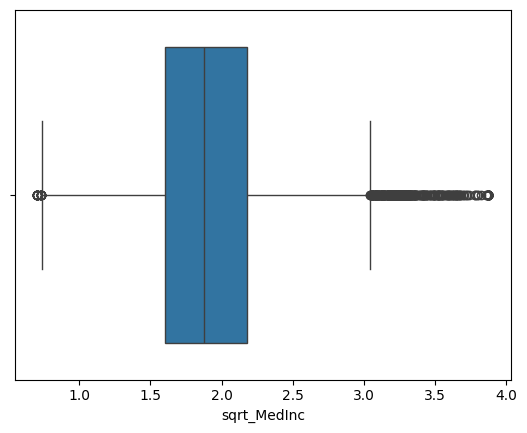

In [43]:
# посмотрим на общую картину выбросов
get_boxplot(tmp, columns=['sqrt_MedInc'])

не помогло

In [44]:
get_score(tmp, tmp['MedHouseVal'])

0.6852881083573759

было 0.6660344606670252

In [45]:
# удалим столбец и вернес предидущее значение
tmp = data_processed.copy()
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,False,854.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,False,854.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,False,854.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,False,854.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,False,854.0


2. HouseAge — средний возраст дома в группе блоков

In [46]:
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,False,854.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,False,854.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,False,854.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,False,854.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,False,854.0


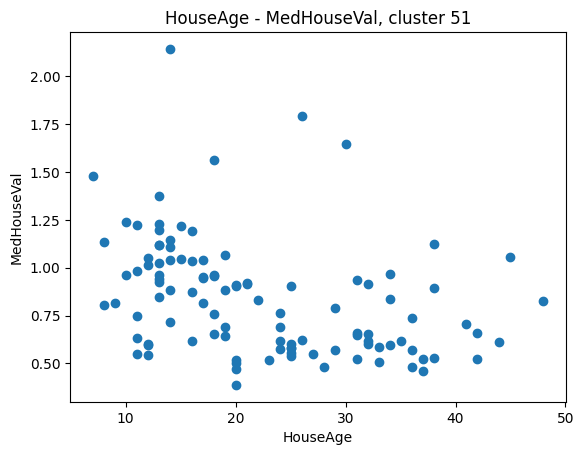

In [47]:
# построим зависимость HouseAge - MedHouseVal
effect_of_parameter (tmp, parameter='HouseAge', random_case=True)

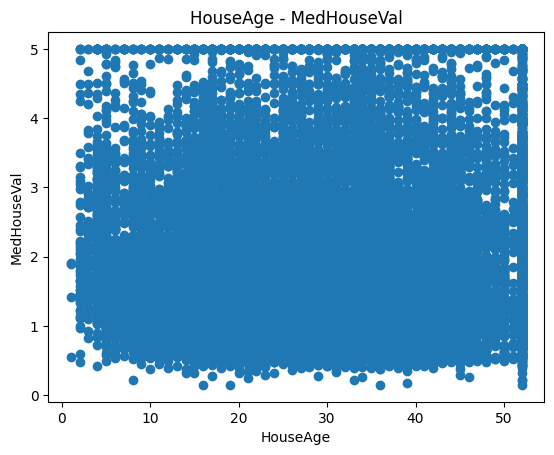

In [48]:
effect_of_parameter (tmp, parameter='HouseAge', random_case=False)

Вот и от кластеров появилась польза) на общих графиках очень мало информации

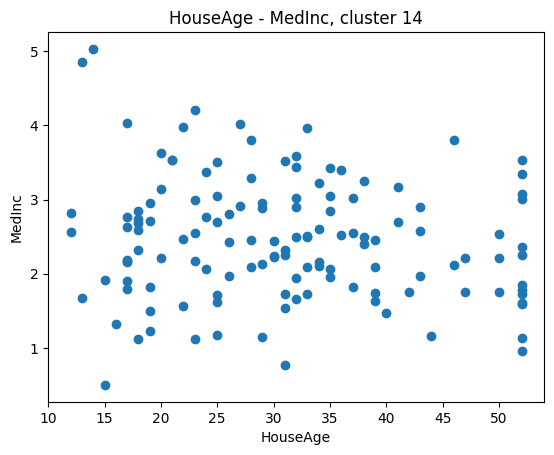

In [49]:
# попробуем посмотреть на HouseAge - MedInc
effect_of_parameter (tmp, parameter='HouseAge', target='MedInc', random_case=True)

тоже явной зависимости не вижу

3 AveRooms — среднее количество комнат на домохозяйство

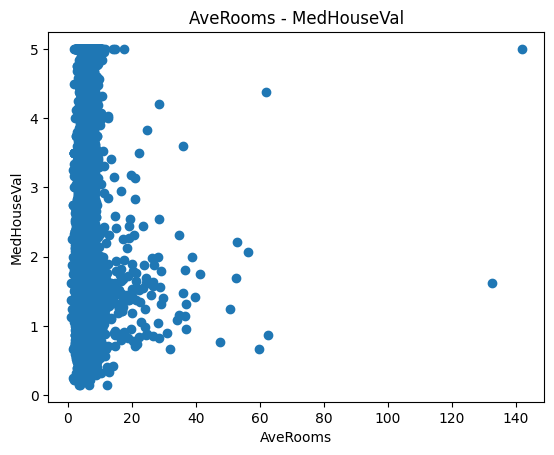

In [50]:
effect_of_parameter (tmp, parameter='AveRooms', random_case=False)

cluster  49


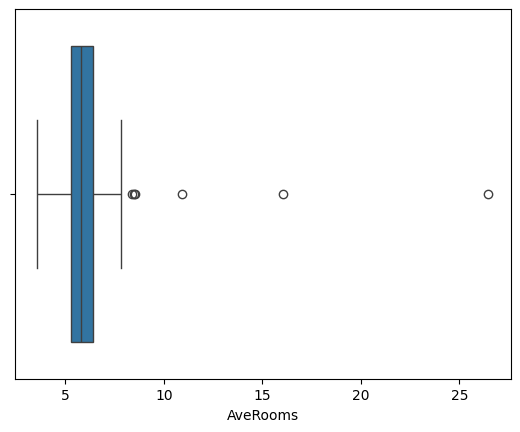

In [51]:
rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
get_boxplot(tmp[tmp['cluster'] == int(rand_int)], columns=['AveRooms'])

Что делать с выбросами пока не придумал. Пока введу еще один параметр - MedInc / AveRooms (доход / количество комнат)

In [52]:
tmp['MedInc-AveRooms'] = tmp['MedInc'] / tmp['AveRooms']
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,False,854.0,1.192017
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,False,854.0,1.330750
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,False,854.0,0.875637
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,False,854.0,0.970046
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,False,854.0,0.612272


cluster  20


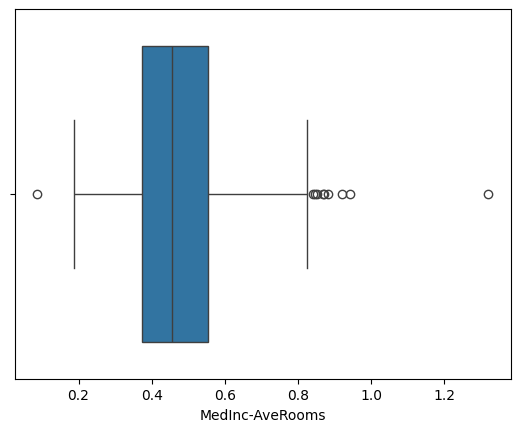

In [53]:
rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
get_boxplot(tmp[tmp['cluster'] == int(rand_int)], columns=['MedInc-AveRooms'])

и по нему выбросы есть

In [54]:
get_score(tmp, tmp['MedHouseVal'])

0.6862191685537864

было 0.6660344606670252

очень не значительно

4 AveBedrms — среднее количество спален на домохозяйство;

cluster  19


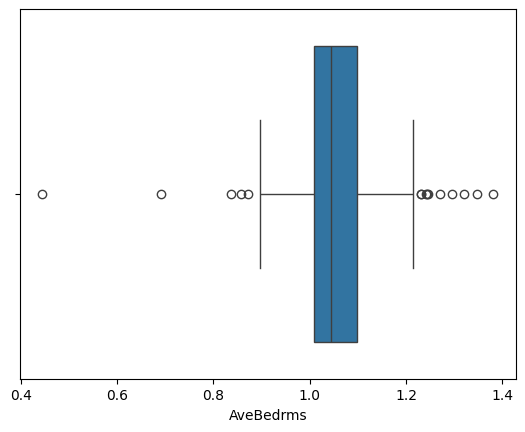

In [55]:
# посмотрим выбросы
rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
get_boxplot(tmp[tmp['cluster'] == int(rand_int)], columns=['AveBedrms'])

Поступим аналогичным образом. MedInc / AveBedrms (доход на количество спален) должен лучше степень благосостояния показывать

In [56]:
tmp['MedInc-AveBedrms'] = tmp['MedInc'] / tmp['AveBedrms']
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,False,854.0,1.192017,8.131591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,False,854.0,1.330750,8.541585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,False,854.0,0.875637,6.760841
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,False,854.0,0.970046,5.258889
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,False,854.0,0.612272,3.557735


In [57]:
get_score(tmp, tmp['MedHouseVal'])

0.6910456868509118

было 0.6663598862127452

5 Population — население группы блоков

In [58]:
# попробую определить степень благосостояния как
# Population/ AveBedrms (население / спальни)

tmp['Population-AveBedrms'] = tmp['Population'] / tmp['AveBedrms']
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,854.0,1.192017,8.131591,314.511628
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,854.0,1.330750,8.541585,2470.468354
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,854.0,0.875637,6.760841,462.063158
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,854.0,0.970046,5.258889,520.008511
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,854.0,0.612272,3.557735,522.625000


In [59]:
get_score(tmp, tmp['MedHouseVal'])

0.6925117512107559

было 0.6722811023576302

In [60]:
# сохраним полученные данные
data_processed = tmp.copy()
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,False,854.0,1.192017,8.131591,314.511628
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,False,854.0,1.330750,8.541585,2470.468354
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,False,854.0,0.875637,6.760841,462.063158
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,False,854.0,0.970046,5.258889,520.008511
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,False,854.0,0.612272,3.557735,522.625000


6 AveOccup — среднее количество членов домохозяйства

In [61]:
# поделю опять
# AveOccup/ AveBedrms (членов семьи / спальни)

tmp['AveOccup-AveBedrms'] = tmp['AveOccup'] / tmp['AveBedrms']
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms,AveOccup-AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,854.0,1.192017,8.131591,314.511628,2.496124
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,854.0,1.330750,8.541585,2470.468354,2.170886
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,854.0,0.875637,6.760841,462.063158,2.610526
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,854.0,0.970046,5.258889,520.008511,2.374468
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,854.0,0.612272,3.557735,522.625000,2.017857


In [62]:
get_score(tmp, tmp['MedHouseVal'])

0.6926096088951067

было 0.6746201856344927

In [63]:
# сохраним полученные данные
data_processed = tmp.copy()
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms,AveOccup-AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,False,854.0,1.192017,8.131591,314.511628,2.496124
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,False,854.0,1.330750,8.541585,2470.468354,2.170886
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,False,854.0,0.875637,6.760841,462.063158,2.610526
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,False,854.0,0.970046,5.258889,520.008511,2.374468
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,False,854.0,0.612272,3.557735,522.625000,2.017857


In [64]:
# тут я пытался строит отчет EDA
# пустая трата времени
# огромное количество информации
# абсолютно не наглядной
# и крайне громозкой
#
# !pip install dataprep
# from dataprep.eda import create_report
# отчёт EDA
# report = create_report(tmp)
# отчёт
# report.show()

Вернемся к единственно роботающему у меня подходу - кластеризации

На мой взгляд большое количество выбросов по всем показателям объясняется "классовым неравенством". Очень много очень дорогих объектов

Выберу для параметра MedInc — (средний доход в группе блоков) три кластера:

1. Для бедных
2. Для среднего класса
3. Для богатых

По крайней мере тут есть некая логика

In [65]:
# была мысль искать новые кластеры внутри гео-кластеров
# но я от нее отказался
# считаю, что престижные объекты должны быть сосредоточены в наиболее престижных гео-кластерах
kmeans = KMeans(n_clusters=3)
cluster_vip = kmeans.fit_predict(data_processed[['MedInc']])
cluster_vip

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [67]:
# посмотрим на уникальнын значения в наших кластерах
unique, frequency = np.unique(cluster_vip,
                              return_counts = True)
print("Unique Values:", unique)
print("Frequency Values:", frequency)

Unique Values: [0 1 2]
Frequency Values: [11593  7789  1258]


Посмотрим на выбросы сейчас

In [68]:
tmp['cluster_vip'] = cluster_vip
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms,AveOccup-AveBedrms,cluster_vip
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,47,...,False,False,False,False,854.0,1.192017,8.131591,314.511628,2.496124,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,47,...,False,False,False,False,854.0,1.330750,8.541585,2470.468354,2.170886,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,47,...,False,False,False,False,854.0,0.875637,6.760841,462.063158,2.610526,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,47,...,False,False,False,False,854.0,0.970046,5.258889,520.008511,2.374468,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,47,...,False,False,False,False,854.0,0.612272,3.557735,522.625000,2.017857,1


In [74]:
tmp['cluster_vip'].head()

,cluster_vip
0,2
1,2
2,2
3,1
4,1


In [77]:
rand_geo = np.random.randint(0, 58)
rand_vip = np.random.randint(0, 2)
columns = 'MedInc'
tmp_ = tmp.copy()
tmp_ = tmp_[(tmp_['cluster'] == int(rand_geo)) &
            (tmp_['cluster_vip'] == int(rand_vip))
           ]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_54,cluster_55,cluster_56,cluster_57,frequency,MedInc-AveRooms,MedInc-AveBedrms,Population-AveBedrms,AveOccup-AveBedrms,cluster_vip
11900,6.6635,14.0,7.500808,1.025040,3565.0,2.879645,33.94,-117.37,2.196,44,...,False,False,False,False,555.0,0.888371,6.500719,3477.911742,2.809299,1
11902,4.3176,52.0,6.251418,1.045369,1269.0,2.398866,33.97,-117.39,1.362,44,...,False,False,False,False,555.0,0.690659,4.130218,1213.925859,2.294756,1
11907,5.0194,38.0,5.961207,1.025862,649.0,2.797414,33.97,-117.40,1.489,44,...,False,False,False,False,555.0,0.842011,4.892861,632.638655,2.726891,1
11908,3.8618,41.0,6.345725,1.026022,660.0,2.453532,33.97,-117.40,1.348,44,...,False,False,False,False,555.0,0.608567,3.763856,643.260870,2.391304,1
11910,3.8640,24.0,5.444714,1.094775,2398.0,2.913730,33.96,-117.41,1.234,44,...,False,False,False,False,555.0,0.709679,3.529492,2190.403996,2.661487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13537,4.3438,33.0,6.180769,1.084615,608.0,2.338462,34.15,-117.30,1.150,44,...,False,False,False,False,555.0,0.702793,4.004922,560.567376,2.156028,1
13543,3.9231,34.0,5.209719,0.984655,1195.0,3.056266,34.15,-117.31,0.960,44,...,False,False,False,False,555.0,0.753035,3.984239,1213.623377,3.103896,1
13544,3.8594,45.0,5.413793,0.954023,401.0,2.304598,34.15,-117.30,0.908,44,...,False,False,False,False,555.0,0.712883,4.045395,420.325301,2.415663,1
13561,6.2236,32.0,6.488789,0.957399,1151.0,2.580717,34.16,-117.27,1.597,44,...,False,False,False,False,555.0,0.959131,6.500528,1202.215457,2.695550,1


In [156]:
# постролим функцию случайной визуализации
def get_boxplot_random (data, claster=False, claster_vip=False,
                        columns=[], rand_geo=False, rand_vip=False):
    tmp_ = data.copy()
    if (claster == True) & (claster_vip == True):
        rand_geo = rand_geo
        tmp_ = tmp_[(tmp_['cluster'] == int(rand_geo))]
        print ('geo-cluster {}'.format(rand_geo))
    else:
        rand_geo = np.random.randint(0, 58)
        rand_vip = np.random.randint(0, 2)
        tmp_ = tmp_[(tmp_['cluster'] == int(rand_geo)) &
                (tmp_['cluster_vip'] == int(rand_vip))
               ]
        print ('geo-cluster {} vip_cluster {}'.format(rand_geo, rand_vip))

    get_boxplot(tmp_, columns=[columns])

    return rand_geo, rand_vip

geo-cluster 10 vip_cluster 1


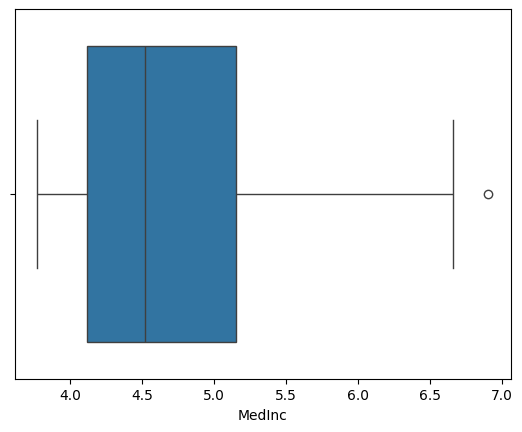

In [164]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='MedInc')

geo-cluster 10


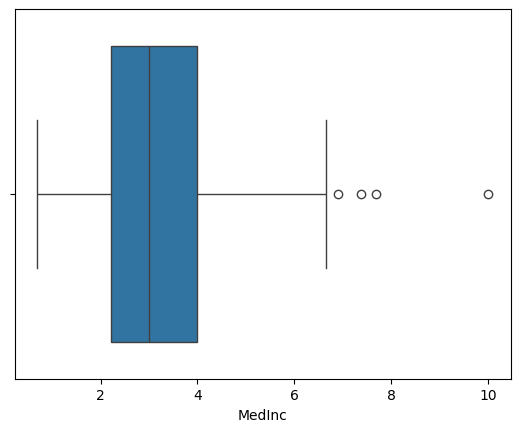

In [165]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='MedInc', rand_geo=rand_geo, rand_vip=rand_vip)

Не идеально, но ожидаемо лучше

Посмотрим другие параметры (в некорых кластерах данные отсутствуют)

HouseAge

geo-cluster 43 vip_cluster 1


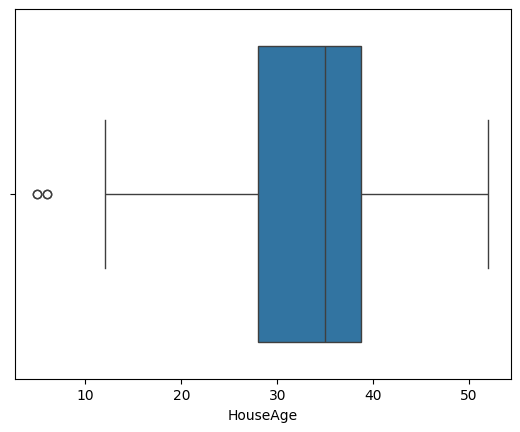

In [167]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='HouseAge')

geo-cluster 43


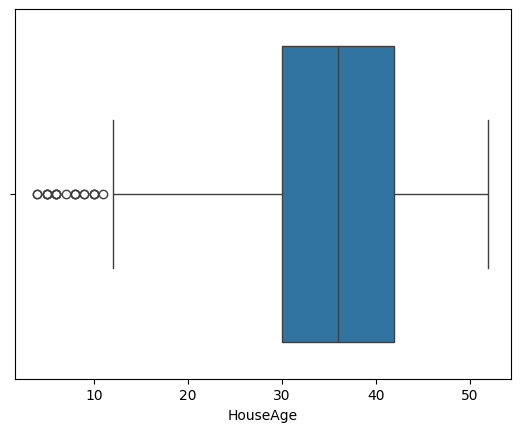

In [168]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='HouseAge', rand_geo=rand_geo, rand_vip=rand_vip)

AveRooms

geo-cluster 44 vip_cluster 0


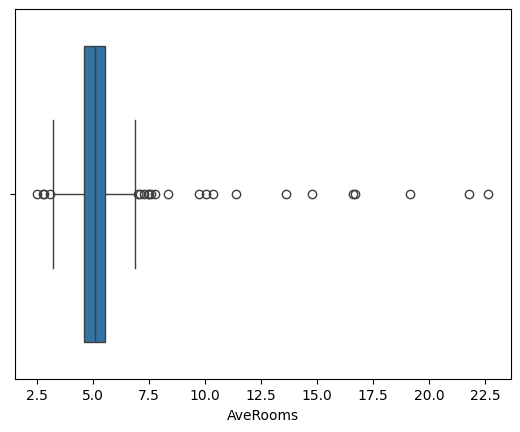

In [170]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='AveRooms')

geo-cluster 44


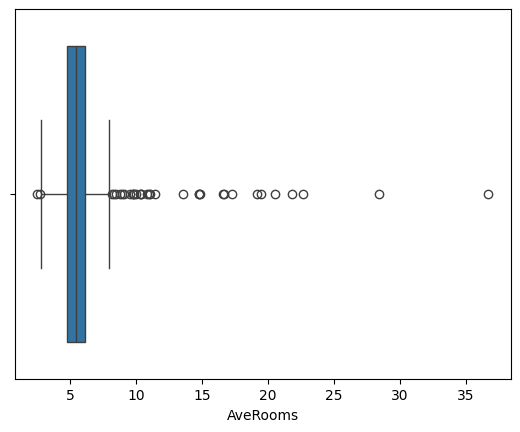

In [171]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='AveRooms', rand_geo=rand_geo, rand_vip=rand_vip)

AveBedrms

geo-cluster 35 vip_cluster 0


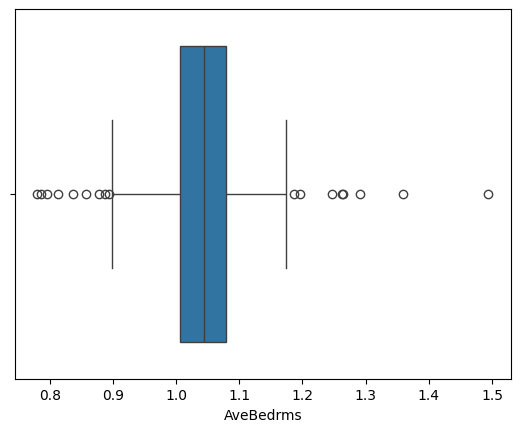

In [173]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='AveBedrms')

geo-cluster 35


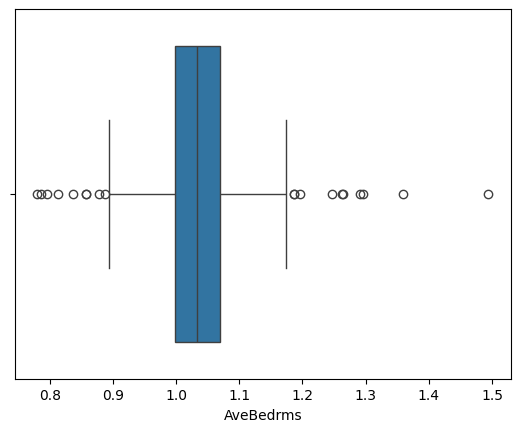

In [174]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='AveBedrms', rand_geo=rand_geo, rand_vip=rand_vip)

Population

geo-cluster 44 vip_cluster 0


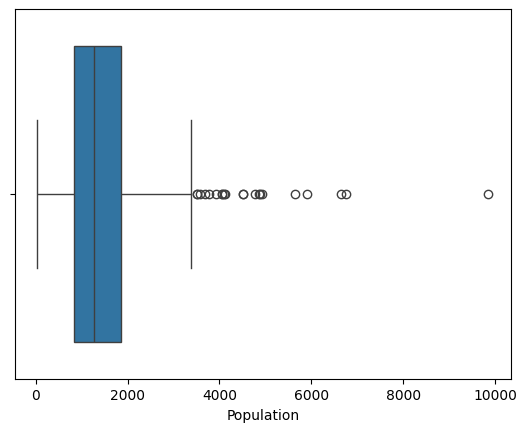

In [175]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='Population')

geo-cluster 44


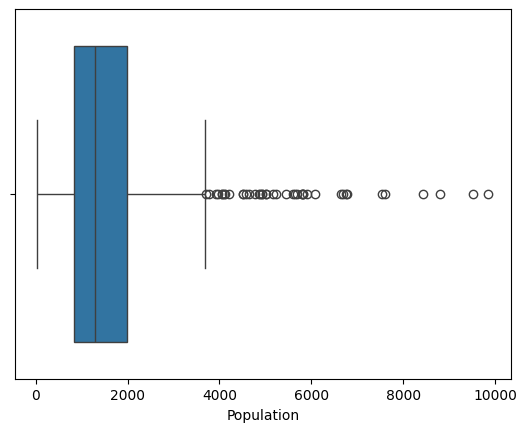

In [176]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='Population', rand_geo=rand_geo, rand_vip=rand_vip)

AveOccup

geo-cluster 43 vip_cluster 0


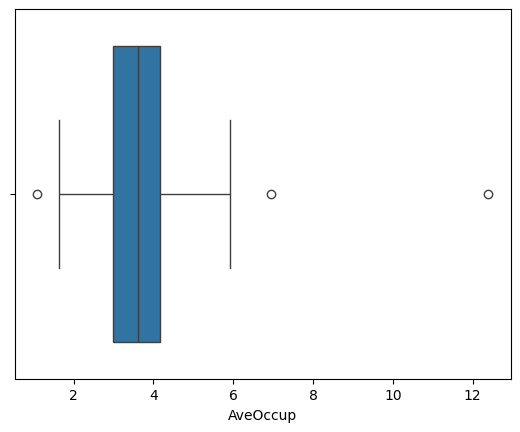

In [178]:
# смотрим
rand_geo, rand_vip = get_boxplot_random (tmp, claster=False, claster_vip=False, columns='AveOccup')

пока оставим

geo-cluster 43


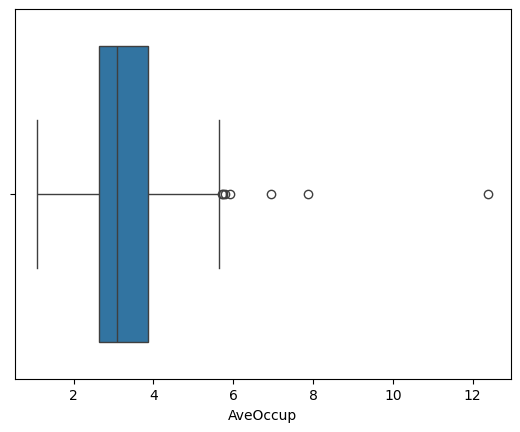

In [179]:
# сравним
f = get_boxplot_random (tmp, claster=True, claster_vip=True,
                    columns='AveOccup', rand_geo=rand_geo, rand_vip=rand_vip)

На какие-то параметры влияние сильное. На другие не очень